In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/comments_label.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65529 entries, 0 to 65528
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Comment          65529 non-null  object 
 1   tokens           65529 non-null  object 
 2   cleansing        64455 non-null  object 
 3   sentence_length  65529 non-null  int64  
 4   normalized       64378 non-null  object 
 5   sentiment        65529 non-null  object 
 6   score            65529 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.5+ MB


In [4]:
df

,Comment,tokens,cleansing,sentence_length,normalized,sentiment,score
0,Komentar komentar buzzeRp seragam,"['komentar', 'komentar', 'buzzerp', 'seragam']",komentar komentar buzzerp seragam,4,komentar komentar buzzerp seragam,neutral,0.993686
1,Semoga indonesia jangan hanya tinggal nama,"['semoga', 'indonesia', 'jangan', 'hanya', 'ti...",semoga indonesia tinggal nama,6,semoga indonesia tinggal nama,positive,0.599724
2,"Tidak sadarkah diri yg memangku amanah, bahwa ...","['tidak', 'sadarkah', 'diri', 'yg', 'memangku'...",sadarkah memangku amanah langkah gerak gerik p...,30,sadarkah memangku amanah langkah gerak gerik p...,negative,0.976866
3,Sore ini aku mendapatkan amplop dan nama calon...,"['sore', 'ini', 'aku', 'mendapatkan', 'amplop'...",sore amplop nama calonnya lakukan,20,sore amplop nama calonnya lakukan,neutral,0.997550
4,02🎉,['02🎉'],02,1,02,neutral,0.498101
...,...,...,...,...,...,...,...
65524,Inilah kenapa indonesia menjadi bahan tawaan p...,"['inilah', 'kenapa', 'indonesia', 'menjadi', '...",indonesia bahan tawaan pejabat2 negeri sungguh...,36,indonesia bahan tawaan pejabat2 negeri sungguh...,negative,0.997651
65525,"Misal ini mah ya, kalo emang bener gibran mela...","['misal', 'ini', 'mah', 'ya', ',', 'kalo', 'em...",mah emang bener gibran melanggar etik melangga...,40,mah gibran melanggar etik melanggar konstitusi...,negative,0.997051
65526,Semoga cak nun diberikan kesehatan dan umur pa...,"['semoga', 'cak', 'nun', 'diberikan', 'kesehat...",semoga cak nun kesehatan umur membimbing memba...,20,semoga cak nun kesehatan umur membimbing memba...,positive,0.944426
65527,"Fix 02 pakai cara curang, di planning dalam ja...","['fix', '02', 'pakai', 'cara', 'curang', ',', ...",fix 02 pakai curang planning jangka liciknya r...,15,fix 02 pakai curang planning jangka liciknya r...,negative,0.994774


In [5]:
import nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
new_df = df[['Comment','cleansing','normalized','sentiment', 'score']]

In [7]:
new_df

,Comment,cleansing,normalized,sentiment,score
0,Komentar komentar buzzeRp seragam,komentar komentar buzzerp seragam,komentar komentar buzzerp seragam,neutral,0.993686
1,Semoga indonesia jangan hanya tinggal nama,semoga indonesia tinggal nama,semoga indonesia tinggal nama,positive,0.599724
2,"Tidak sadarkah diri yg memangku amanah, bahwa ...",sadarkah memangku amanah langkah gerak gerik p...,sadarkah memangku amanah langkah gerak gerik p...,negative,0.976866
3,Sore ini aku mendapatkan amplop dan nama calon...,sore amplop nama calonnya lakukan,sore amplop nama calonnya lakukan,neutral,0.997550
4,02🎉,02,02,neutral,0.498101
...,...,...,...,...,...
65524,Inilah kenapa indonesia menjadi bahan tawaan p...,indonesia bahan tawaan pejabat2 negeri sungguh...,indonesia bahan tawaan pejabat2 negeri sungguh...,negative,0.997651
65525,"Misal ini mah ya, kalo emang bener gibran mela...",mah emang bener gibran melanggar etik melangga...,mah gibran melanggar etik melanggar konstitusi...,negative,0.997051
65526,Semoga cak nun diberikan kesehatan dan umur pa...,semoga cak nun kesehatan umur membimbing memba...,semoga cak nun kesehatan umur membimbing memba...,positive,0.944426
65527,"Fix 02 pakai cara curang, di planning dalam ja...",fix 02 pakai curang planning jangka liciknya r...,fix 02 pakai curang planning jangka liciknya r...,negative,0.994774


In [8]:
print(new_df["normalized"].isna().sum())

1151


In [9]:
new_df = new_df.drop(new_df[(new_df["normalized"].isna()) & (new_df["sentiment"] != "neutral")].index)

In [10]:
print(new_df["normalized"].isna().sum())

0


In [13]:
new_df["tokenized_normalized"] = new_df["normalized"].apply(lambda x: word_tokenize(str(x)))

In [12]:
new_df["tokenized_normalized"]

0                   [komentar, komentar, buzzerp, seragam]
1                       [semoga, indonesia, tinggal, nama]
2        [sadarkah, memangku, amanah, langkah, gerak, g...
3                  [sore, amplop, nama, calonnya, lakukan]
4                                                     [02]
                               ...                        
65524    [indonesia, bahan, tawaan, pejabat2, negeri, s...
65525    [mah, gibran, melanggar, etik, melanggar, kons...
65526    [semoga, cak, nun, kesehatan, umur, membimbing...
65527    [fix, 02, pakai, curang, planning, jangka, lic...
65528    [film, mengedukasi, semoga, masyarakat, cerdas...
Name: tokenized_normalized, Length: 64378, dtype: object

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64378 entries, 0 to 65528
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Comment     64378 non-null  object 
 1   cleansing   64378 non-null  object 
 2   normalized  64378 non-null  object 
 3   sentiment   64378 non-null  object 
 4   score       64378 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.9+ MB


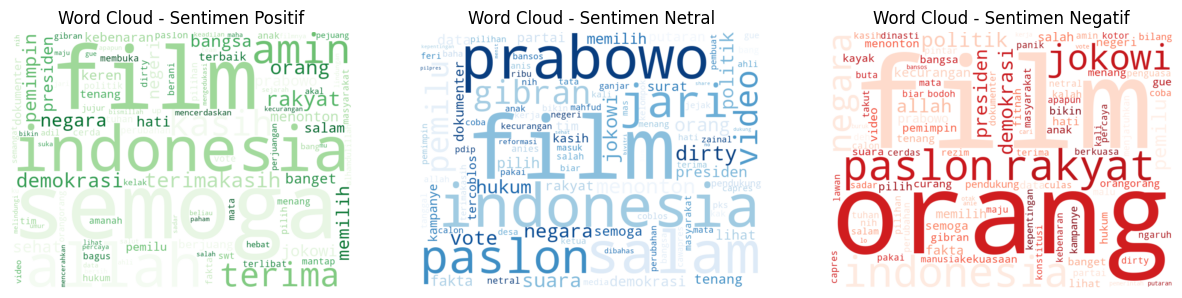

Jumlah kata 'prabowo' dalam sentimen positif: 510
Jumlah kata 'prabowo' dalam sentimen netral: 892
Jumlah kata 'prabowo' dalam sentimen negatif: 1555


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stop_words = set(stopwords.words('indonesian'))

def hitung_jumlah_kata(sentimen, kata):
    return sum(1 for tokens in new_df[new_df['sentiment'] == sentimen]['tokenized_normalized'] if kata in tokens)

wordcloud_positive = WordCloud(width=800, height=600,
                            background_color='white',
                            max_words=100,
                            colormap='Greens',  
                            stopwords=stop_words,
                            collocations=False).generate(' '.join(new_df[new_df['sentiment'] == 'positive']['normalized']))

wordcloud_neutral = WordCloud(width=800, height=600,
                            background_color='white',
                            max_words=100,
                            colormap='Blues',  
                            stopwords=stop_words,
                            collocations=False).generate(' '.join(new_df[new_df['sentiment'] == 'neutral']['normalized']))

wordcloud_negative = WordCloud(width=800, height=600,
                            background_color='white',
                            max_words=100,
                            colormap='Reds', 
                            stopwords=stop_words,
                            collocations=False).generate(' '.join(new_df[new_df['sentiment'] == 'negative']['normalized']))



plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Positif')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Netral')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Sentimen Negatif')
plt.axis('off')
plt.show()

kata_yang_dihitung = 'prabowo'

jumlah_kata_positif = hitung_jumlah_kata('positive', kata_yang_dihitung)
jumlah_kata_neutral = hitung_jumlah_kata('neutral', kata_yang_dihitung)
jumlah_kata_negatif = hitung_jumlah_kata('negative', kata_yang_dihitung)

print(f"Jumlah kata '{kata_yang_dihitung}' dalam sentimen positif: {jumlah_kata_positif}")
print(f"Jumlah kata '{kata_yang_dihitung}' dalam sentimen netral: {jumlah_kata_neutral}")
print(f"Jumlah kata '{kata_yang_dihitung}' dalam sentimen negatif: {jumlah_kata_negatif}")


In [15]:
def listToString(text):
    return ' '.join([str(elem) for elem in text])


In [22]:
test_df = new_df.copy()
test_df

,Comment,cleansing,normalized,sentiment,score,tokenized_normalized
0,Komentar komentar buzzeRp seragam,komentar komentar buzzerp seragam,komentar komentar buzzerp seragam,neutral,0.993686,"[komentar, komentar, buzzerp, seragam]"
1,Semoga indonesia jangan hanya tinggal nama,semoga indonesia tinggal nama,semoga indonesia tinggal nama,positive,0.599724,"[semoga, indonesia, tinggal, nama]"
2,"Tidak sadarkah diri yg memangku amanah, bahwa ...",sadarkah memangku amanah langkah gerak gerik p...,sadarkah memangku amanah langkah gerak gerik p...,negative,0.976866,"[sadarkah, memangku, amanah, langkah, gerak, g..."
3,Sore ini aku mendapatkan amplop dan nama calon...,sore amplop nama calonnya lakukan,sore amplop nama calonnya lakukan,neutral,0.997550,"[sore, amplop, nama, calonnya, lakukan]"
4,02🎉,02,02,neutral,0.498101,[02]
...,...,...,...,...,...,...
65524,Inilah kenapa indonesia menjadi bahan tawaan p...,indonesia bahan tawaan pejabat2 negeri sungguh...,indonesia bahan tawaan pejabat2 negeri sungguh...,negative,0.997651,"[indonesia, bahan, tawaan, pejabat2, negeri, s..."
65525,"Misal ini mah ya, kalo emang bener gibran mela...",mah emang bener gibran melanggar etik melangga...,mah gibran melanggar etik melanggar konstitusi...,negative,0.997051,"[mah, gibran, melanggar, etik, melanggar, kons..."
65526,Semoga cak nun diberikan kesehatan dan umur pa...,semoga cak nun kesehatan umur membimbing memba...,semoga cak nun kesehatan umur membimbing memba...,positive,0.944426,"[semoga, cak, nun, kesehatan, umur, membimbing..."
65527,"Fix 02 pakai cara curang, di planning dalam ja...",fix 02 pakai curang planning jangka liciknya r...,fix 02 pakai curang planning jangka liciknya r...,negative,0.994774,"[fix, 02, pakai, curang, planning, jangka, lic..."


In [23]:
kemunculan_kata_sentimen = {}
for tokens, sentimen in zip(test_df['tokenized_normalized'], test_df['sentiment']):
    for kata in set(tokens):
        if kata not in kemunculan_kata_sentimen:
            kemunculan_kata_sentimen[kata] = {'positive': 0, 'neutral': 0, 'negative': 0}
        kemunculan_kata_sentimen[kata][sentimen] += 1
kata_lebih_dari_satu_sentimen = set()
for kata, kemunculan_sentimen in kemunculan_kata_sentimen.items():
    if all(count > 0 for count in kemunculan_sentimen.values()):
        kata_lebih_dari_satu_sentimen.add(kata)
stop_words.update(kata_lebih_dari_satu_sentimen)


In [24]:
print(True if 'film' in stop_words else False)

True


In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [20]:
tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1,2))
X = tfidf.fit_transform(new_df["normalized"])

In [21]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
y = new_df["sentiment"]
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
y

array([1, 2, 0, ..., 2, 0, 2])

In [25]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [26]:
len(tfidf.get_feature_names_out())

15000

In [27]:
tfidf.get_feature_names_out()

array(['01', '01 01', '01 02', ..., 'zulhas', 'zulkifli',
       'zulkifli hasan'], dtype=object)

In [28]:
features, labels = X, y

In [29]:
mnb = MultinomialNB()

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=7)
kf = KFold(n_splits=5, shuffle=True, random_state=42) 
accuracies = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    mnb.fit(X_train_fold, y_train_fold)
    predictions = mnb.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, predictions)
    accuracies.append(accuracy)
    print("Akurasi validasi set:", accuracy)

final_mnb = MultinomialNB() 
final_mnb.fit(X_train, y_train)
predictions = final_mnb.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print("Akurasi test set:", test_accuracy)
print("Rata-rata akurasi semua folds:", sum(accuracies) / len(accuracies))


Akurasi validasi set: 0.6967382863059798
Akurasi validasi set: 0.7047249190938512
Akurasi validasi set: 0.6955339805825242
Akurasi validasi set: 0.6960517799352751
Akurasi validasi set: 0.7061488673139159
Akurasi test set: 0.7100031065548307
Rata-rata akurasi semua folds: 0.6998395666463093


In [31]:
print(classification_report(y_test, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.70      0.92      0.80     14130
     neutral       0.72      0.38      0.50      6094
    positive       0.75      0.53      0.62      5528

    accuracy                           0.71     25752
   macro avg       0.73      0.61      0.64     25752
weighted avg       0.72      0.71      0.69     25752



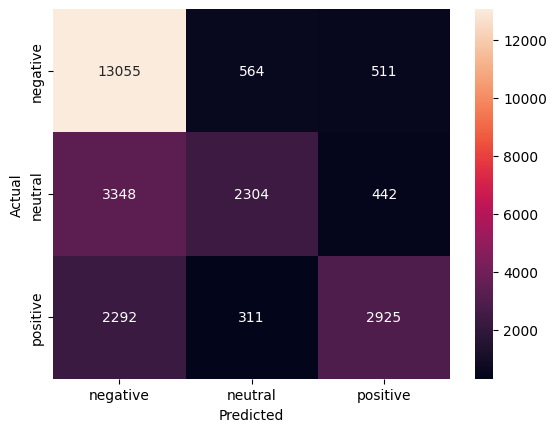

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
svm = SVC(kernel='linear')

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=7)
kf = KFold(n_splits=5, shuffle=True, random_state=42) 
accuracies = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    svm.fit(X_train_fold, y_train_fold)
    predictions = mnb.predict(X_val_fold)
    accuracy = accuracy_score(y_val_fold, predictions)
    accuracies.append(accuracy)
    print("Akurasi validasi set:", accuracy)

final_svm = SVC() 
final_svm.fit(X_train, y_train)
predictions = final_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print("Akurasi test set:", test_accuracy)
print("Rata-rata akurasi semua folds:", sum(accuracies) / len(accuracies))


Akurasi validasi set: 0.7507118819570282
Akurasi validasi set: 0.7576699029126214
Akurasi validasi set: 0.7461488673139158
Akurasi validasi set: 0.7451132686084142
Akurasi validasi set: 0.7061488673139159
Akurasi test set: 0.7645231438334886
Rata-rata akurasi semua folds: 0.7411585576211792


In [35]:
print(classification_report(y_test, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.78      0.89      0.83     14130
     neutral       0.71      0.55      0.62      6094
    positive       0.75      0.68      0.71      5528

    accuracy                           0.76     25752
   macro avg       0.75      0.71      0.72     25752
weighted avg       0.76      0.76      0.76     25752



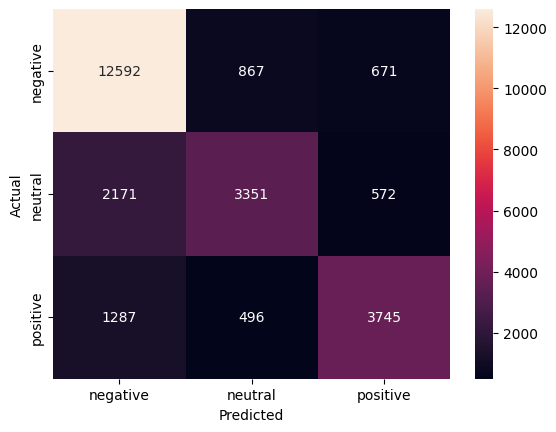

In [36]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
# deep-forest
from deepforest import CascadeForestClassifier

clf = CascadeForestClassifier()

In [38]:
from deepforest import CascadeForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=7)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    X_train_fold_dense = X_train_fold.toarray()
    X_val_fold_dense = X_val_fold.toarray()
    clf = CascadeForestClassifier()
    clf.fit(X_train_fold_dense, y_train_fold)
    predictions = clf.predict(X_val_fold_dense)
    accuracy = accuracy_score(y_val_fold, predictions)
    accuracies.append(accuracy)
    print("Akurasi validasi set:", accuracy)
final_clf = CascadeForestClassifier()
final_clf.fit(X_train.toarray(), y_train)
predictions = final_clf.predict(X_test.toarray())
test_accuracy = accuracy_score(y_test, predictions)
print("Akurasi test set:", test_accuracy)
print("Rata-rata akurasi semua folds:", np.mean(accuracies))


[2024-04-28 06:03:08.789] Start to fit the model:
[2024-04-28 06:03:08.790] Fitting cascade layer = 0 
[2024-04-28 06:45:55.220] layer = 0  | Val Acc = 72.006 % | Elapsed = 2566.430 s
[2024-04-28 06:45:58.024] Fitting cascade layer = 1 
[2024-04-28 06:53:49.009] layer = 1  | Val Acc = 73.825 % | Elapsed = 470.985 s
[2024-04-28 06:53:49.043] Fitting cascade layer = 2 
[2024-04-28 07:01:42.243] layer = 2  | Val Acc = 74.068 % | Elapsed = 473.199 s
[2024-04-28 07:01:42.279] Fitting cascade layer = 3 
[2024-04-28 07:09:38.490] layer = 3  | Val Acc = 74.071 % | Elapsed = 476.211 s
[2024-04-28 07:09:38.525] Fitting cascade layer = 4 
[2024-04-28 07:17:33.395] layer = 4  | Val Acc = 73.955 % | Elapsed = 474.869 s
[2024-04-28 07:17:33.395] Early stopping counter: 1 out of 2
[2024-04-28 07:17:33.432] Fitting cascade layer = 5 
[2024-04-28 07:25:38.619] layer = 5  | Val Acc = 73.883 % | Elapsed = 485.187 s
[2024-04-28 07:25:38.619] Early stopping counter: 2 out of 2
[2024-04-28 07:25:38.619] Han

In [39]:
print(classification_report(y_test, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.76      0.86      0.81     14130
     neutral       0.64      0.53      0.58      6094
    positive       0.73      0.63      0.68      5528

    accuracy                           0.73     25752
   macro avg       0.71      0.67      0.69     25752
weighted avg       0.73      0.73      0.73     25752



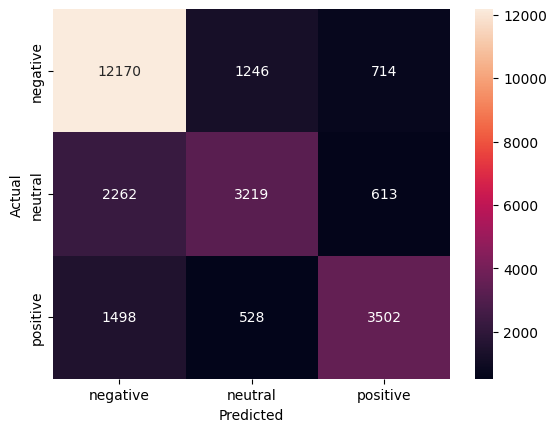

In [40]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()